In [2]:
import drops, utilities, wave_reflection
from scipy.optimize import fsolve
%matplotlib inline

In [226]:
t = linspace(0, 100, 1000)

soln, impacts = drops.ode_standalone(t)

TypingError: Failed at nopython (nopython frontend)
Invalid usage of getitem with parameters (float64, int64)
 * parameterized
File "drops.py", line 158
[1] During: typing of intrinsic-call at C:\Users\david\code\quantum\drops.py (158)
[2] During: typing of static-get-item at C:\Users\david\code\quantum\drops.py (158)

In [132]:
x = soln[:, 0, 0]
y = soln[:, 0, 1]
z = soln[:, 0, 2]

utilities.plot_path(soln)


TypeError: unorderable types: numpy.ndarray() < str()

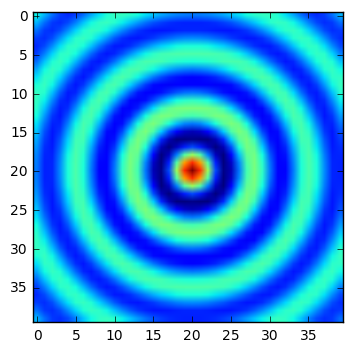

In [250]:
utilities.wave_field(30, impacts[:1], resolution=1)
plt.show()

In [96]:
impact = drops.Impact(0, -65, -30, 1)
point = (-70, -30)


# solutions should be -.6969, 7.969,   and 6.5122,   -4.6465, per sympy. 
# Your eqs are right, so wtf?

drops.find_wall_collision(impact, point)


AttributeError: module 'drops' has no attribute 'find_wall_collision'

In [95]:
from numpy import arctan2

s = sqrt(2)/2

xi, yi = -s, s
xw, yw = -s, -s
xp, yp = .5, .5


# θiw = arctan2(yw - yi, xw - xi)  # angle from impact to wall
θiw = arctan2(yw - yi, xw - xi) % τ  # angle from impact to wall
θw = arctan2(yw, xw) % τ # normal to the wall


θwp = (2 * θw - θiw + τ/2) % τ # bounce angle
θwp = ((2 * θw - θiw) + τ/2) % τ # bounce angle  # tdo 

print(θiw/τ, θw/τ, θwp/τ,  sep='\n')

0.75
0.625
0.0


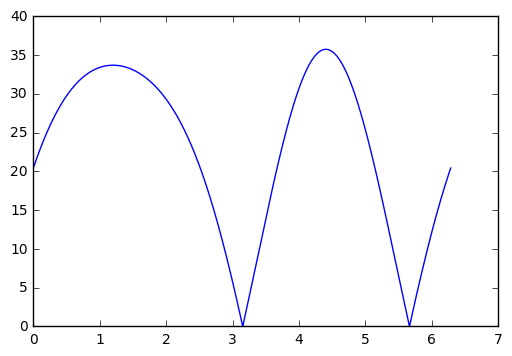

In [100]:
center = array([0, 0])

# This will cause 4 solutions!
# sample = drops.Point(-30, 0)
# impact = drops.Point(50, 9)

sample = array([-40, 0])
impact = array([6.6, 10])

θ = linspace(0, τ, 30000)

cast = partial(wave_reflection.cast_ray, impact, sample, center)

dists = array(list(map(cast, θ)))
plt.plot(θ, dists)

cast2 = partial(wave_reflection.cast_ray_fsolvable, impact, sample, center)
fsolve(cast2, 4)

cast(tau/2)





In [137]:
sample = array([-4, 0])
impact = array([6.6, 1])

%timeit list(wave_reflection.find_reflection_points(impact, sample))

The slowest run took 81.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 5.89 ms per loop


In [150]:
impacts = [drops.Impact(0, 0, 0, 1)]
#            drops.Impact(10, 100, 105, 1)]

# utilities.wave_field(20, impacts)
drops.net_surface_height(10, impacts, drops.Point(2, 2))

C:\Users\david\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


C:\Users\david\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


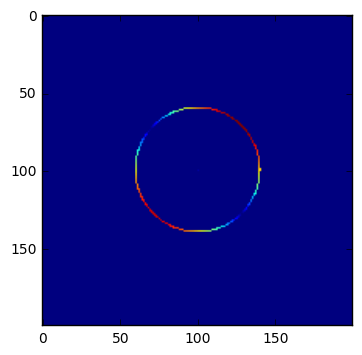

In [202]:
# impact = drops.Point(10, -23)
# impact = (10, -23)
impact = array([2, 0])
sample = array([-1, -1])
center = array([0, 0])

# %timeit wave_reflection.simple_collision(impact, 3*tau/8)
wave_reflection.cast_ray(impact, sample, center, tau/8)

result = np.zeros([200, 200])
for θ in linspace(0, τ, 360):
    for r in range(0, drops.D, 40):
        point = array([r* cos(θ), r * sin(θ)])
        d = wave_reflection.cast_ray(impact, point, center, τ/8)
        
        index_x = int(result.shape[1]/2) + point[0]
        index_y = int(result.shape[0]/2) + point[1]
        
        result[index_y, index_x] = d

        
plt.imshow(result)

